# El error estándar

En la lección anterior vimos un teorema fundamental en la Estadística Inferencial: el Teorema del Límite Central.

En esta lección partiremos de este teorema para comprender el concepto del error estándar que es una manera de cuantificar qué tan fiable es la estimación que estamos haciendo de la media de la población a partir de la distribución muestral de las medias.

Para entender este concepto comenzaremos retomando los resultados obtenidos en el ejercicio práctico de la lección anterior. Y luego usaremos este ejemplo como punto de partida para definir formalmente el concepto del error estándar y de igual manera veremos sus principales usos en Ciencia de Datos y Machine Learning.

Al final haremos un breve resumen de los principales aspectos a tener en cuenta al momento de hablar del error estándar.

## 1. Ejercicio práctico

Para entender el significado del error estándar retomaremos parte de los resultados obtenidos en la lección anterior.

En particular:

- Leeremos el set de datos *dataset-multiples-distribuciones.csv*
- Por cada una de las cuatro distribuciones dibujaremos la distribución original (población, a la izquierda) y la distribución muestral de las medias (a la derecha)

Por tanto el código que usaremos a continuación será exactamente el mismo usado en la lección anterior:

In [3]:
import numpy as np
# Función para obtener distribuciones muestrales (usando la media de la muestra)
def calcular_d_muestral(arreglo, n=200, trials=1000):
    # Inicializar arreglo que contendrá la distribución
    dm = np.zeros((trials))
    
    # Iterar por el número de "trials" y en cada iteración:
    # Extraer "n" muestras aleatoriamente
    # Calcular la estadística (media de la muestra)
    # Almacenar resultado
    for i in range(trials):
        # Muestreo aleatorio
        muestra = np.random.choice(arreglo, n)
        
        # Calcular estadística y almacenar en la distribución
        dm[i] = np.mean(muestra)
    
    # Al terminar las iteraciones retornar la distribución muestral
    return dm

Y ahora leamos el set de datos, calculemos las distribuciones muestrales con la función anterior y generemos las gráficas mencionadas anteriormente:

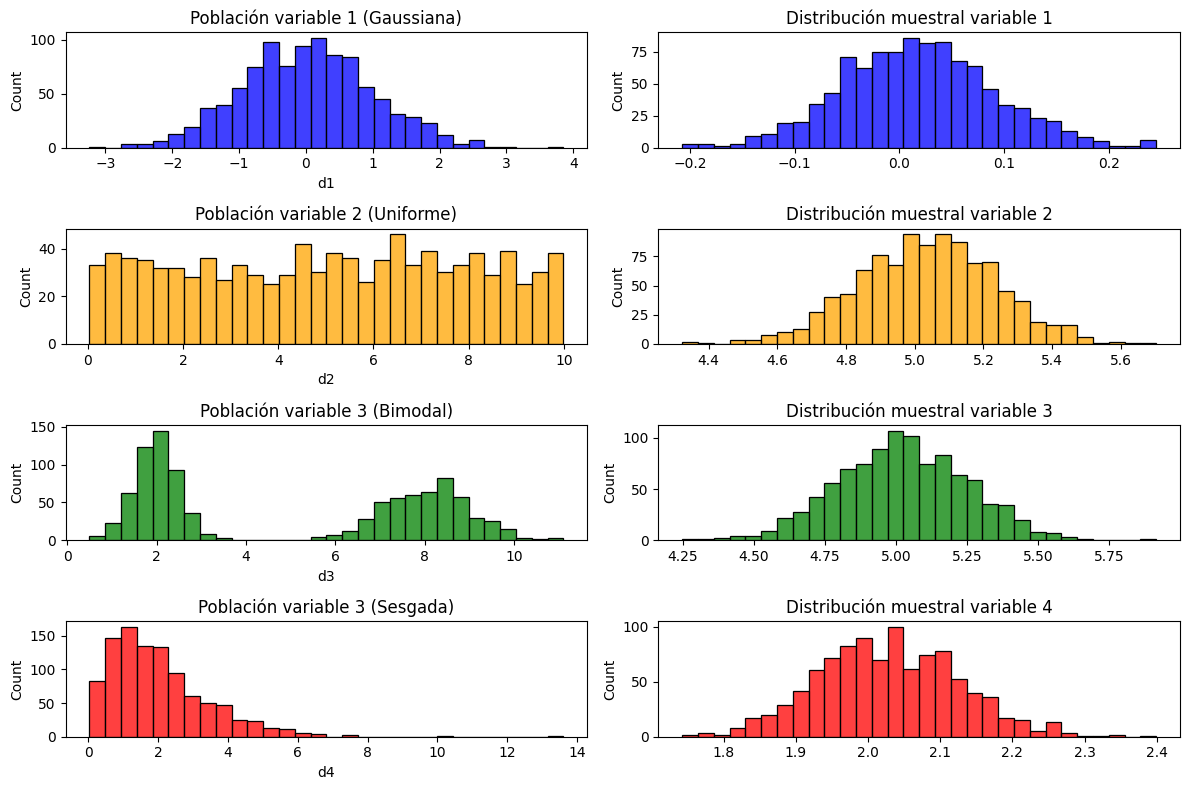

In [4]:
# Leer dataset con 4 distribuciones
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ruta ="/Users/hectorrr/proyectos/pruebas prametricas/dataset-multiples-distribuciones.csv"
df = pd.read_csv(ruta)

# Calcular distribuciones muestrales de la media
dm_d1 = calcular_d_muestral(df['d1'].to_numpy())
dm_d2 = calcular_d_muestral(df['d2'].to_numpy())
dm_d3 = calcular_d_muestral(df['d3'].to_numpy())
dm_d4 = calcular_d_muestral(df['d4'].to_numpy())

# Generar gráficos de distribuciones originales (izquierda) y distribuciones muestrales
# Crear figura con 4 filas (una por cada población) y 2 columnas (izquierda: distribución
# de la población, derecha: distribución muestral de las medias)
fig, axs = plt.subplots(4, 2, figsize=(12, 8))

# Histogramas columna 1 (población y distribución de las medias)
sns.histplot(df['d1'], ax=axs[0,0], color='blue', bins=30)
axs[0,0].set_title('Población variable 1 (Gaussiana)')

sns.histplot(dm_d1, ax=axs[0,1], color='blue', bins=30)
axs[0,1].set_title('Distribución muestral variable 1')

# Histogramas columna 2 (población y distribución de las medias)
sns.histplot(df['d2'], ax=axs[1,0], color='orange', bins=30)
axs[1,0].set_title('Población variable 2 (Uniforme)')

sns.histplot(dm_d2, ax=axs[1,1], color='orange', bins=30)
axs[1,1].set_title('Distribución muestral variable 2')

# Histogramas columna 3 (población y distribución de las medias)
sns.histplot(df['d3'], ax=axs[2,0], color='green', bins=30)
axs[2,0].set_title('Población variable 3 (Bimodal)')

sns.histplot(dm_d3, ax=axs[2,1], color='green', bins=30)
axs[2,1].set_title('Distribución muestral variable 3')

# Histogramas columna 4 (población y distribución de las medias)
sns.histplot(df['d4'], ax=axs[3,0], color='red', bins=30)
axs[3,0].set_title('Población variable 3 (Sesgada)')

sns.histplot(dm_d4, ax=axs[3,1], color='red', bins=30)
axs[3,1].set_title('Distribución muestral variable 4')

# Ajustar distribución para que no se traslapen las gráficas
plt.tight_layout();


¡Perfecto! Este es nuestro punto de partida para introducir el concepto de error estándar.

En la lección anterior, cuando hablamos del Teorema del Límite Central, mencionamos que la media de la distribución muestral se aproxima bastante bien a la media de la población (siempre y cuando usemos muestras con 30 datos o más).

Pero, ¿qué pasa con el comportamiento de la desviación estándar en la distribución muestral de las medias? ¿Esta desviación estándar de la distribución tiene alguna relación con la desviación estándar en la población?

Para verificar esto hagamos el siguiente ejercicio: por cada una de las cuatro distribuciones imprimamos en pantalla el nombre de la distribución, el tamaño de la muestra usado para obtener la distribución muestral (*n=200* en todos los casos), la desviación estándar en la población y la desviación estándar de la distribución muestral:

In [5]:
# Encabezados
print(f"{'Distribución':<15}{'Tamaño de la muestra':<25}{'Desviación población':<30}{'Desviación distr. muestral':<30}")
print('='*100)

# Gaussiana
print(f"{'Gaussiana':<15}{200:<25}{df['d1'].std():<30}{np.std(dm_d1):<30}")

# Uniforme
print(f"{'Uniforme':<15}{200:<25}{df['d2'].std():<30}{np.std(dm_d2):<30}")

# Bimodal
print(f"{'Bimodal':<15}{200:<25}{df['d3'].std():<30}{np.std(dm_d3):<30}")

# Sesgada
print(f"{'Sesgada':<15}{200:<25}{df['d4'].std():<30}{np.std(dm_d4):<30}")

Distribución   Tamaño de la muestra     Desviación población          Desviación distr. muestral    
Gaussiana      200                      0.9792159381796757            0.07331195918789843           
Uniforme       200                      2.8835683506464815            0.20082004928472902           
Bimodal        200                      3.1322858928494943            0.22680091907790026           
Sesgada        200                      1.4291731004891368            0.09798659913819627           


A simple vista parece que no hay relación alguna entre la desviación estándar de la distribución muestral (última columna) y la desviación estándar de la población (tercera columna).

Sin embargo, hagamos este ejercicio:
- Dividamos la desviación estándar de la población entre la raíz cuadrada de *n* (el tamaño de la muestra)
- Imprimamos en pantalla el resultado anterior junto con la desviación estándar de la distribución muestral

Y hagamos esto para cada una de las cuatro distribuciones:

In [6]:
n = 200

print('Gaussiana: ')
print(f"\tsigma/sqrt(n):           {df['d1'].std()/np.sqrt(n):.3f}")
print(f"\tDesviación distribución: {np.std(dm_d1):.3f}")

print('\nUniforme: ')
print(f"\tsigma/sqrt(n):           {df['d2'].std()/np.sqrt(n):.3f}")
print(f"\tDesviación distribución: {np.std(dm_d2):.3f}")

print('\nBimodal: ')
print(f"\tsigma/sqrt(n):           {df['d3'].std()/np.sqrt(n):.3f}")
print(f"\tDesviación distribución: {np.std(dm_d3):.3f}")

print('\nSesgada: ')
print(f"\tsigma/sqrt(n):           {df['d4'].std()/np.sqrt(n):.3f}")
print(f"\tDesviación distribución: {np.std(dm_d4):.3f}")

Gaussiana: 
	sigma/sqrt(n):           0.069
	Desviación distribución: 0.073

Uniforme: 
	sigma/sqrt(n):           0.204
	Desviación distribución: 0.201

Bimodal: 
	sigma/sqrt(n):           0.221
	Desviación distribución: 0.227

Sesgada: 
	sigma/sqrt(n):           0.101
	Desviación distribución: 0.098


Y acá vemos un resultado muy interesante: **si dividimos la desviación estándar de la población ($\sigma$) entre la raíz cuadrada del tamaño de la muestra ($\sqrt(n)$) obtendremos como resultado la desviación estándar de la distribución de las muestras**

¡Y esta es precisamente la definición del error estándar!

## 2. Definición del error estándar

<p></p>
<div style="background-color: #F7CAC9; color: black; padding: 10px;">
    El error estándar ($\sigma_{\bar{x}}$) <b>es la desviación estándar de la distribución muestral de las medias</b> y se calcula como la desviación estándar de la población ($\sigma$) dividida entre la raíz cuadrada del tamaño de la muestra ($\sqrt{n}$): <p>$\text{Error estándar} = \sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}}$
</div>    

## 3. Usos del error estándar

1. Es una medida de qué tan fiable es la estimación que estamos haciendo de la media a partir de las muestras:
   - Si $\sigma_{\bar{x}}$ es "grande" quiere decir que los promedios calculados a partir de las muestras cambian mucho entre una muestra y otra: alta variabilidad y la estimación de la media es poco fiable. Esto implica que el valor de "n" es pequeño y que debemos incrementar el tamaño de la muestra
   - Si $\sigma_{\bar{x}}$ es casi cero quiere decir que los promedios calculados a partir de las muestras cambian muy poco: poca variabilidad y la estimación de la media es más fiable. Esto implica que el valor de "n" es grande
   
2. El error estándar es la base para obtener los intervalos de confianza de mi estadística, otro parámetro del cual hablaremos en la próxima lección

3. Como veremos más adelante, el tamaño de la muestra se puede calcular definiendo los intervalos de confianza deseados. Entonces, indirectamente el error estándar permite determinar el tamaño de la muestra requerido.

4. Se usa para aplicar pruebas de hipótesis como z-test y t-test que veremos en próximas lecciones.


## 4. Aspectos a tener en cuenta

- El error estándar es simplemente la desviación estándar de la distribución muestral de las medias calculada a partir de la población.
- Y este error es una medida de qué tan fiable es la estimación que estamos haciendo de la media de la población a partir de la distribución muestral: un valor "pequeño" de este error nos indica una buena estimación y viceversa.
- Este error estándar es inversamente proporcional a la raíz cuadrada del tamaño de la muestra. Esto quiere decir que si *n* (el tamaño de la muestra) es lo suficientemente "grande", el error estándar será "pequeño" y esto indica que la estimación de la media de la población, a partir de la distribución muestral, será más fiable.